In [1]:
# 필요한 라이브러리 설치 및 임포트
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
colab_path = 'drive/MyDrive//Colab Notebooks/detection/binary'

In [4]:
#데이터 로드
# df =  colab_path + '/final_dataset.csv'
df =  colab_path + '/final_dataset (1).csv'

In [5]:
df = pd.read_csv(df)

In [6]:
df.head()

,Entropy,ATT_Tactic_ Collection,ATT_Tactic_ Command and Control,ATT_Tactic_ Credential Access,ATT_Tactic_ Defense Evasion,ATT_Tactic_ Discovery,ATT_Tactic_ Execution,ATT_Tactic_ Impact,ATT_Tactic_ Persistence,ATT_Tactic_ Privilege Escalation,...,namespace_targeting,namespace_impact,capabilityNum_matches,ATT_Tech_pca1,ATT_Tech_pca2,ATT_Tech_pca3,ATT_Tech_pca4,MBC_bahve_pca1,MBC_bahve_pca2,Y
0,3.627348,0,0,0,1,0,1,0,0,0,...,0,0,175,-0.160982,-0.592856,0.136371,0.078794,0.093819,-0.245911,0
1,6.206575,0,0,0,0,0,0,0,0,0,...,0,0,26,-0.996393,0.035682,-0.143355,-0.166479,-1.857098,0.137600,0
2,5.201988,0,0,0,0,0,1,0,0,0,...,0,0,238,-0.714505,-0.104448,-0.203630,-0.290218,-0.288292,1.195986,0
3,3.411478,0,0,0,0,0,0,0,0,0,...,0,0,4,-1.286573,0.255840,0.103630,0.142646,-1.857098,0.137600,0
4,5.994713,0,0,0,0,0,1,0,0,0,...,0,0,168,-0.034360,-0.385603,-0.397255,-0.187214,0.831438,-0.083490,0


In [7]:
df.shape

(47862, 90)

In [8]:
df['Y'].value_counts()

,count
Y,
1,35153
0,12709


In [9]:
df.count()

,0
Entropy,47862
ATT_Tactic_ Collection,47862
ATT_Tactic_ Command and Control,47862
ATT_Tactic_ Credential Access,47862
ATT_Tactic_ Defense Evasion,47862
...,...
ATT_Tech_pca3,47862
ATT_Tech_pca4,47862
MBC_bahve_pca1,47862
MBC_bahve_pca2,47862


In [10]:
# -1 레이블 제외
#df = df[df['Label'] != -1]

# 데이터와 레이블 분리
# X = df.drop(['Y', 'file_name'], axis=1)  # 'Y'과 'file name' 열을 제외한 모든 데이터
X = df.drop(['Y'], axis=1)  # 'Y' 열을 제외한 모든 데이터
y = df['Y']  # 정상(0) or 악성(1)

Text(0.5, 1.0, 'Y')

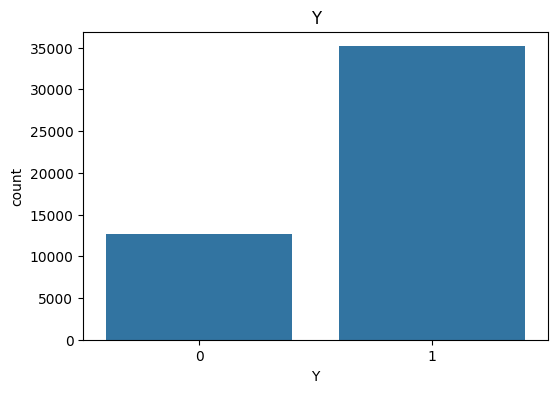

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 변수 분포_ 1:3임을 알 수 있다.
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title('Y')

In [12]:
df.isnull().sum() # 결측값 확인

,0
Entropy,0
ATT_Tactic_ Collection,0
ATT_Tactic_ Command and Control,0
ATT_Tactic_ Credential Access,0
ATT_Tactic_ Defense Evasion,0
...,...
ATT_Tech_pca3,0
ATT_Tech_pca4,0
MBC_bahve_pca1,0
MBC_bahve_pca2,0


In [13]:
# NaN 값을 포함하는 행 제거
df = df.dropna()
df.shape

(47862, 90)

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# SMOTE를 사용하여 오버샘플링
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = X, y

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# X_resampled.shape # 2407-> 3798개로 증가했음을 알 수 있다.

In [15]:
# Extremely Randomized Tree 모델 생성 및 학습
model = ExtraTreesClassifier(n_estimators=20, max_depth=30, random_state=42)
model.fit(X_train, y_train)

# 교차 검증 수행
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

Cross-validation scores: [0.68567847 0.79055677 0.86000836 0.82302549 0.85426243]
Average CV score: 0.8027063051557677


In [16]:
# 테스트 세트에 대한 모델 성능 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=3)  # 여기서 digits 매개변수를 활용해 셋째 자리까지 나타낼 수 있어

print("Extremely Randomized Tree 모델 평가")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Extremely Randomized Tree 모델 평가
Accuracy: 0.9190
Classification Report:
              precision    recall  f1-score   support

           0      0.854     0.837     0.845      2531
           1      0.942     0.948     0.945      7042

    accuracy                          0.919      9573
   macro avg      0.898     0.893     0.895      9573
weighted avg      0.919     0.919     0.919      9573



In [17]:
# 피처 중요도 계산 및 출력
feature_importances = model.feature_importances_
feature_names = X_resampled.columns
importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importances_df = importances_df.sort_values('importance', ascending=False)

print("Top 50 Feature Importances:")
print(importances_df.head(50))

Top 50 Feature Importances:
                              feature  importance
0                             Entropy    0.087162
82              capabilityNum_matches    0.060636
65               namespace_executable    0.039753
74                        namespace_n    0.031473
87                     MBC_bahve_pca1    0.030929
88                     MBC_bahve_pca2    0.030629
56                  namespace_runtime    0.026411
75                        namespace_9    0.024496
9    ATT_Tactic_ Privilege Escalation    0.022701
83                      ATT_Tech_pca1    0.022181
84                      ATT_Tech_pca2    0.022129
80                namespace_targeting    0.021223
35                   MBC_obj_ Process    0.021147
85                      ATT_Tech_pca3    0.019565
60                 namespace_internal    0.019484
55            namespace_anti-analysis    0.019122
8             ATT_Tactic_ Persistence    0.018720
86                      ATT_Tech_pca4    0.018555
66                    

In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,440 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

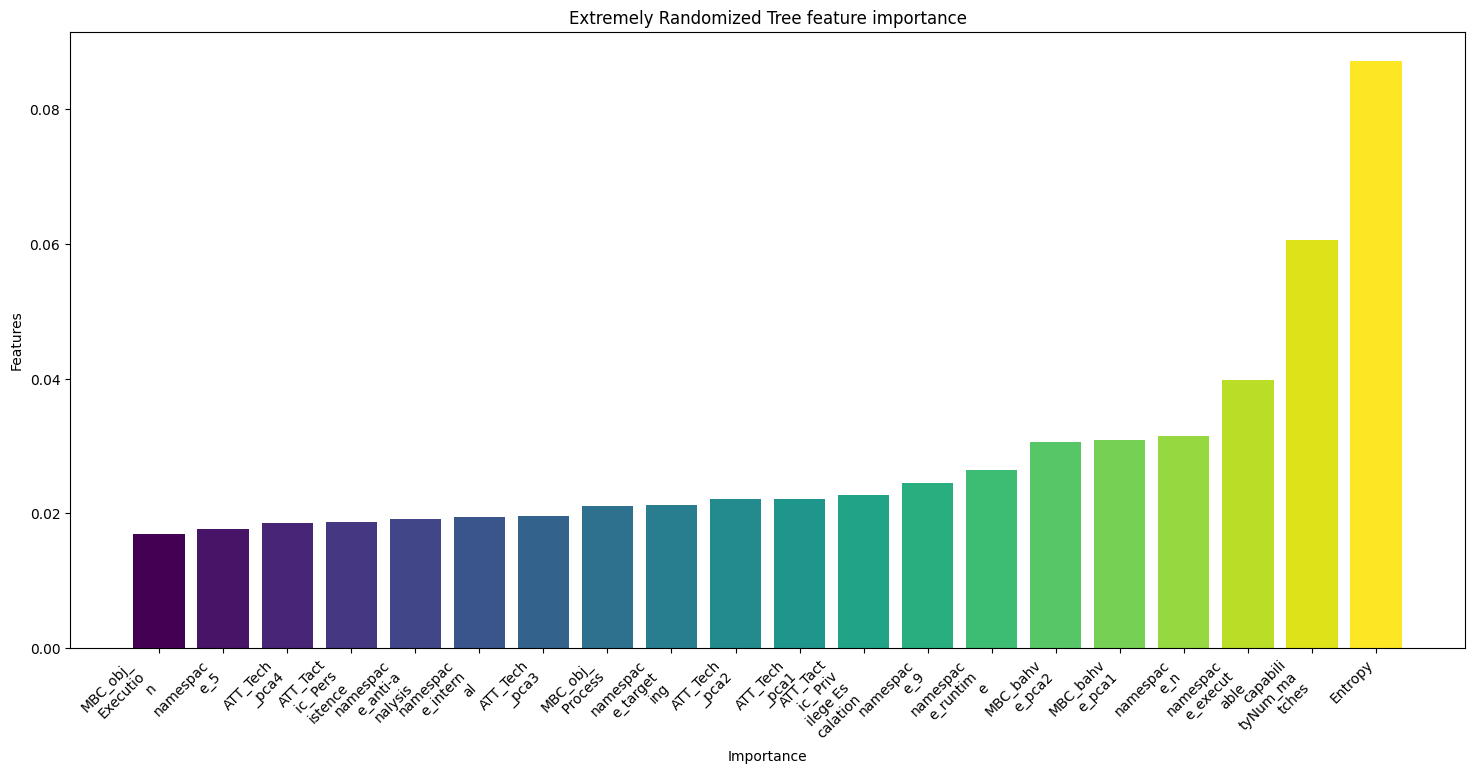

In [19]:
import numpy as np
from matplotlib import pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 가정: feature_importances와 feature_names이 정의되어 있음
# feature_importances = ...
# feature_names = ...

def split_long_words(s, n):
    """주어진 문자열 s를 길이 n마다 줄바꿈 문자를 삽입하여 반환"""
    return '\n'.join([s[i:i+n] for i in range(0, len(s), n)])

# 상위 20개 특성 선택
indices = np.argsort(feature_importances)[-20:]

# 색상 맵 설정
cmap = plt.cm.viridis  # 또는 plt.cm.tab20 등 다양한 colormap 사용 가능
colors = cmap(np.linspace(0, 1, len(indices)))

# 특성 이름을 지정된 길이마다 줄바꿈 처리
max_length = 8
split_feature_names = [split_long_words(feature_names[i], max_length) for i in indices]

plt.figure(figsize=(18, 8))
plt.title(f"Extremely Randomized Tree feature importance")
plt.bar(range(len(indices)), feature_importances[indices], color=colors, align='center')
plt.xticks(range(len(indices)), split_feature_names, rotation=45, ha='right')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()